In [47]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Import the data
directory = 'C:/Users/936344/Desktop/TDSP Framework'

training_dt = pd.read_csv(directory + '/train.csv')
test_dt = pd.read_csv(directory + '/test.csv')

In [22]:
# Calculate the survival rate of passengers for each ticket class.
alive_first = 0
alive_second = 0
alive_third = 0

for index, passenger in training_dt.iterrows():
    if passenger['Pclass'] == 1 and passenger['Survived'] == 1:
        alive_first += 1
    elif passenger['Pclass'] == 2 and passenger['Survived'] == 1:
        alive_second += 1
    elif passenger['Pclass'] == 3 and passenger['Survived'] == 1:
        alive_third += 1

survival_rate_first = (alive_first / sum(training_dt.Pclass == 1))*100
survival_rate_second = (alive_second / sum(training_dt.Pclass == 2))*100
survival_rate_third = (alive_third / sum(training_dt.Pclass == 3))*100


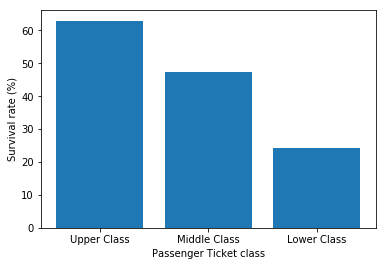

In [25]:
# Plot the resulting statistic in a bar chart.
survival_rates_class = [survival_rate_first, survival_rate_second, survival_rate_third]

formatter = FuncFormatter(survival_rates_class)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
plt.bar([1, 2, 3], survival_rates_class)
plt.xticks([1, 2, 3], ('Upper Class', 'Middle Class', 'Lower Class'))
plt.xlabel('Passenger Ticket class')
plt.ylabel('Survival rate (%)')
plt.show() 

In [19]:
# Calculate the survival rate by sex.
alive_males = 0
alive_females = 0

for index, row in training_dt.iterrows():
    if row['Sex'] == 'male' and row['Survived'] == 1:
        alive_males += 1
    elif row['Sex'] == 'female' and row['Survived'] == 1:
        alive_females += 1

survival_rate_males = (alive_males / sum(training_dt.Sex == 'male'))*100
survival_rate_females = (alive_females / sum(training_dt.Sex == 'female'))*100

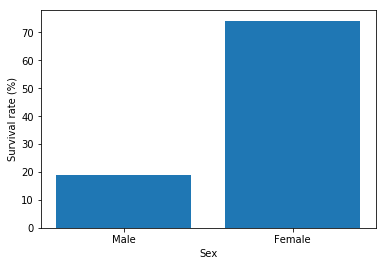

In [21]:
# Plot the resulting statistic in a bar chart.
survival_rates_sex = [survival_rate_males, survival_rate_females]

formatter = FuncFormatter(survival_rates_class)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
plt.bar([1, 2], survival_rates_sex)
plt.xticks([1, 2], ('Male', 'Female'))
plt.xlabel('Sex')
plt.ylabel('Survival rate (%)')
plt.show() 

In [29]:
# Calculate survival rate by embarking place 
Southampton = 0
Cherbourg = 0
Queenstown = 0

for index, row in training_dt.iterrows():
    if row ['Embarked'] == 'S' and row['Survived'] == 1:
        Southampton += 1
    elif row['Embarked'] == 'C' and row['Survived'] == 1:
        Cherbourg += 1
    elif row['Embarked'] == 'Q' and row['Survived'] == 1:
        Queenstown += 1
        
total_survived = 0

for x in training_dt.Survived:
    if x == 1:
        total_survived += 1

Soton = (Southampton/total_survived)*100
Che = (Cherbourg/total_survived)*100
Que = (Queenstown/total_survived)*100

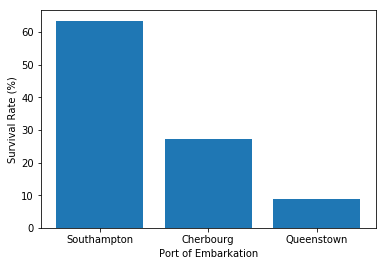

In [66]:
#Plotting results of survival rate by embarking place

survival_rates_Embarked = [Soton, Che, Que]

formatter = FuncFormatter(survival_rates_Embarked)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
plt.bar([1, 2, 3], survival_rates_Embarked)
plt.xticks([1, 2, 3], ('Southampton', 'Cherbourg', 'Queenstown'))
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate (%)')
plt.show() 

In [34]:
# Missing Values 

print('Train columns with null values:\n', training_dt.isnull().sum())


Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [35]:
training_dt['Age'].fillna(training_dt['Age'].median(), inplace = True)

In [38]:
print('Train columns with null values:\n', training_dt.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


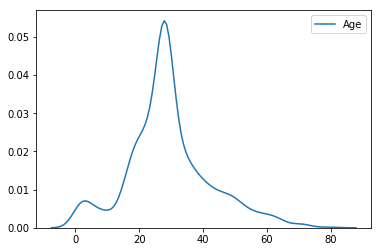

In [39]:
sns.kdeplot(training_dt.Age)

In [50]:
total_survived = 0 

for x in training_dt.Survived:
    if x == 1:
        total_survived += 1

print (total_survived)


342


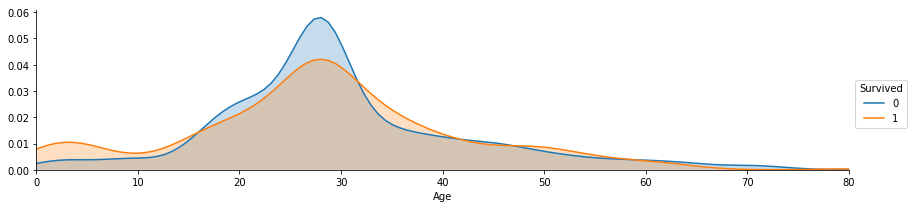

In [65]:
#plot distributions of age of passengers who survived or did not survive
graph = sns.FacetGrid( training_dt, hue = 'Survived', aspect=4 )
graph.map(sns.kdeplot, 'Age', shade= True )
graph.set(xlim=(0 , training_dt['Age'].max()))
graph.add_legend()

In [89]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    
    _ = sns.heatmap(
        df.corr(), 

        square=False, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Titanic Correlation Features', y=1.05, size=15)

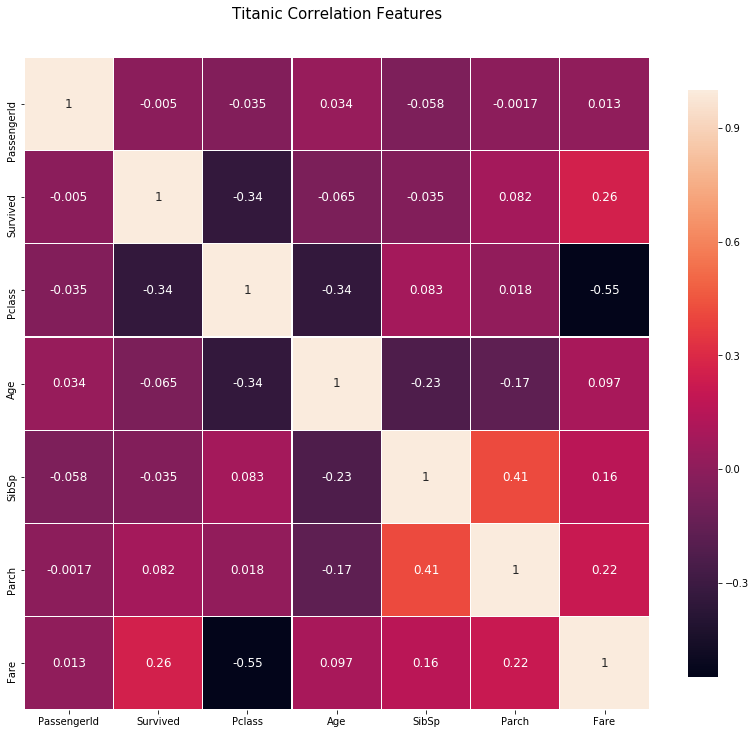

In [90]:
correlation_heatmap(training_dt)